In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('datasets/mlbootcamp5_train.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Part 1. Preliminary data analysis

Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

<Axes: xlabel='gender', ylabel='height'>

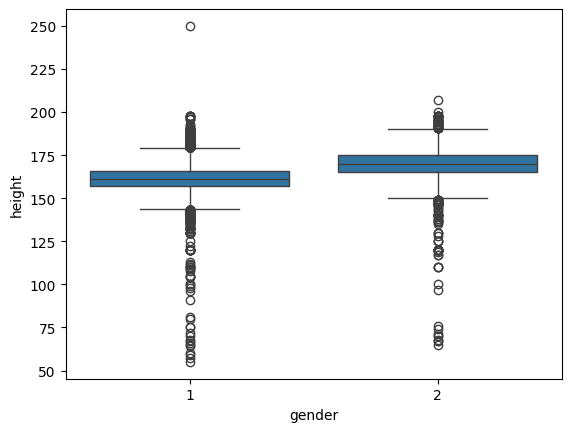

In [3]:
sns.boxplot(data=data, x='gender',y='height')

In [4]:
data.groupby('gender').size()

## There are 24470 Men and 45530 Women in the dataset.

gender
1    45530
2    24470
dtype: int64

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?



In [5]:
data.groupby(by=['alco'])['gender'].value_counts(normalize=True)

alco  gender
0     1         0.669862
      2         0.330138
1     2         0.691552
      1         0.308448
Name: proportion, dtype: float64

Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

In [6]:
total_smokers=data[data['smoke']==0].size
(data[(data['gender']==2)&(data['smoke']==1)].size/total_smokers)-(data[(data['gender']==1)&(data['smoke']==1)].size/total_smokers)


0.0711723143926932

Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [7]:
(data[data['smoke']==0]['age'].median() - data[data['smoke']==1]['age'].median())/365.25 * 12

np.float64(19.613963039014372)

20 months

1.2. Risk maps

In [8]:
data['age_years']=data['age']/365
data['age_years'].round().astype(int)

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age_years, Length: 70000, dtype: int64

In [9]:
data[(data['gender']==2) & (data['age_years']>=60) & (data['smoke']==1) & (data['age_years']<65) & (data['cholesterol']==1) & (data['ap_hi']<120)]['cardio'].mean()

np.float64(0.2777777777777778)

Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?

In [10]:
print('Men')
data[(data['gender']==2) & (data['age_years']>=60) & (data['smoke']==1) & (data['age_years']<65) & (data['cholesterol']==1) & (data['ap_hi']<120)]['cardio'].mean()

Men


np.float64(0.2777777777777778)

In [11]:
print("Women")
data[(data['gender']==1) & (data['age_years']>=60) & (data['smoke']==1) & (data['age_years']<65) & (data['cholesterol']==1) & (data['ap_hi']<120)]['cardio'].mean()

Women


np.float64(0.5714285714285714)

1.3. Analyzing BMI

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [12]:
data['bmi_value']=data['weight']/((data['height']/100)**2)
data['bmi']=pd.cut(data['bmi_value'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])

In [13]:
data[['bmi_value', 'bmi']].head()

,bmi_value,bmi
0,21.967120,Normal weight
1,34.927679,Obesity II
2,23.507805,Normal weight
3,28.710479,Overweight
4,23.011177,Normal weight


Question 1.6. (2 points). Choose the correct statements:

Median BMI in the sample is within boundaries of normal values.

Women’s BMI is on average higher then men’s.

Healthy people have higher median BMI than ill people.

In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women



In [14]:
data['bmi_value'].median()

## Not under normal weight

np.float64(26.374068120774975)

In [15]:
data.groupby('gender')['bmi_value'].mean()

## Women's BMI average is higher than Men's BMI average.

gender
1    27.987583
2    26.754442
Name: bmi_value, dtype: float64

In [16]:
data.groupby(["gender", "alco", "cardio"])["bmi_value"].median().to_frame()

## So the statement is false

bmi_value
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

1.4. Cleaning data

In [18]:
df_to_remove = data[
    (data["ap_lo"] > data["ap_hi"])
    | (data["height"] > data["height"].quantile(0.975))
    | (data["weight"] < data["weight"].quantile(0.025))
    | (data["weight"] > data["weight"].quantile(0.975))
    | (data["height"] < data["height"].quantile(0.025))
]
print(df_to_remove.shape[0] / data.shape[0])

filtered_df = data[~data.index.isin(df_to_remove)]

0.0963


Part 2. Visual data analysis

2.1. Correlation matrix visualization

In [ ]:
filtered_df.drop('bmi',inplace=True,axis=1)

<Axes: >

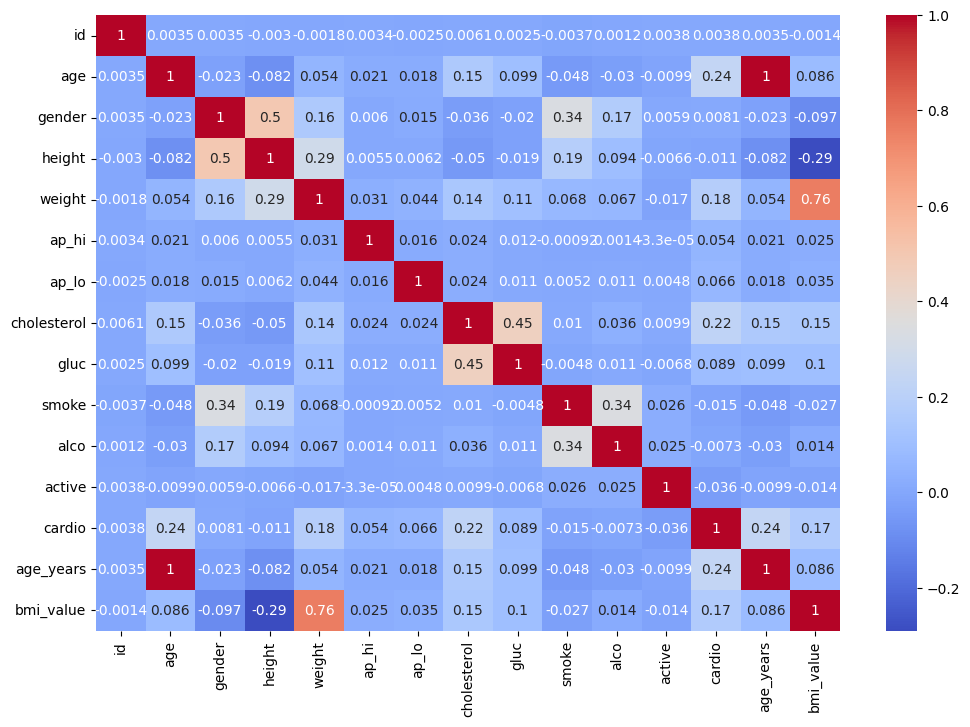

In [34]:
corr=filtered_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?

Height,Smoke has strong correaltion with gender.

2.2. Height distribution of men and women

Create a violin plot for the height and gender using violinplot(). Use the parameters:

hue to split by gender;

scale to evaluate the number of records for each gender.

In [52]:
df_melt = pd.melt(frame=filtered_df, value_vars=["height"], id_vars=["gender"])
df_melt

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
69995,2,height,168
69996,1,height,158
69997,2,height,183
69998,1,height,163


/tmp/ipykernel_15788/2599099392.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(
/tmp/ipykernel_15788/2599099392.py:2: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=True` for the same effect.
  ax = sns.violinplot(


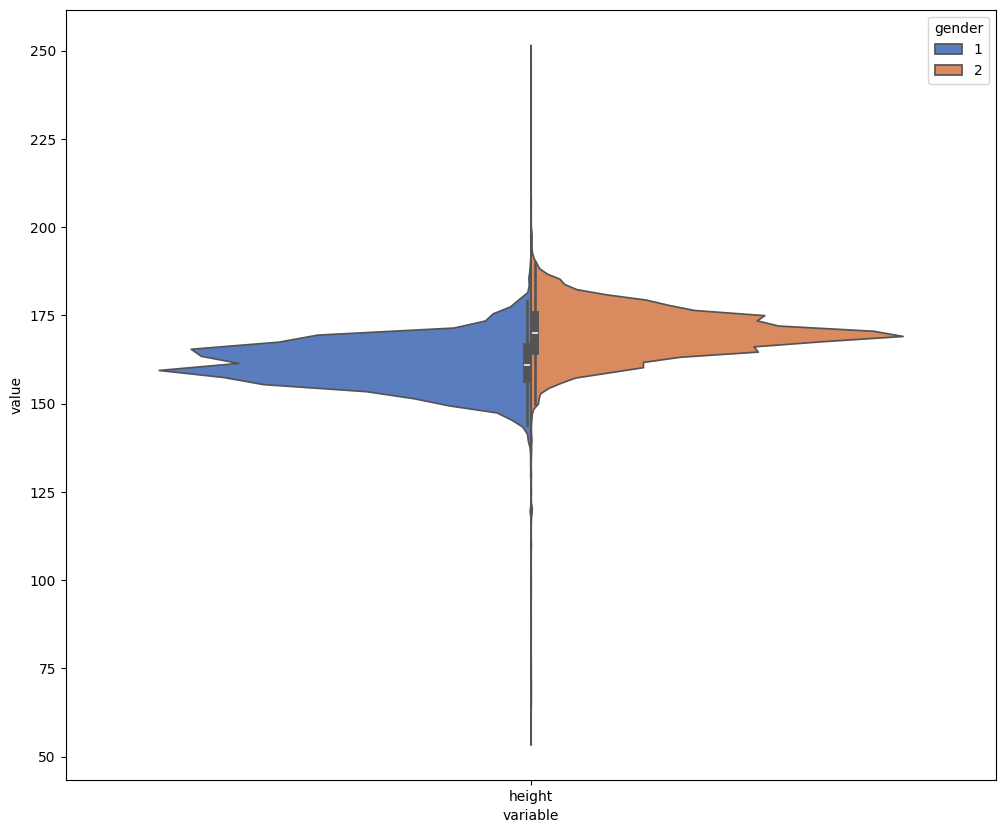

In [53]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

2.3. Rank correlation

Calculate and plot a correlation matrix using the Spearman’s rank correlation coefficient.



<Axes: >

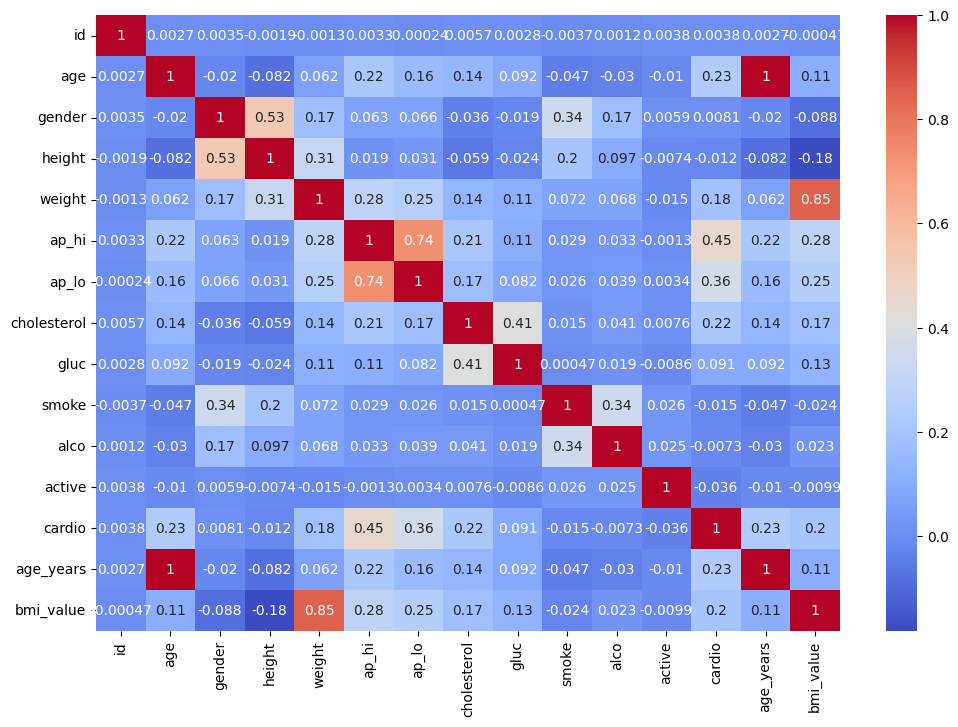

In [56]:
corr2=filtered_df.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(corr2,cmap='coolwarm',annot=True)

Question 2.2. (1 point). Which pair of features has the strongest Spearman rank correlation?



AP_HI and AP_Lo

Question 2.3. (1 point). Why do these features have strong rank correlation?



Nature of the data.



2.4. Age

Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

In [61]:
filtered_df['age_years']

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age_years, Length: 70000, dtype: float64

In [64]:
filtered_df['age_years']=filtered_df['age_years'].round()

<Axes: xlabel='age_years', ylabel='count'>

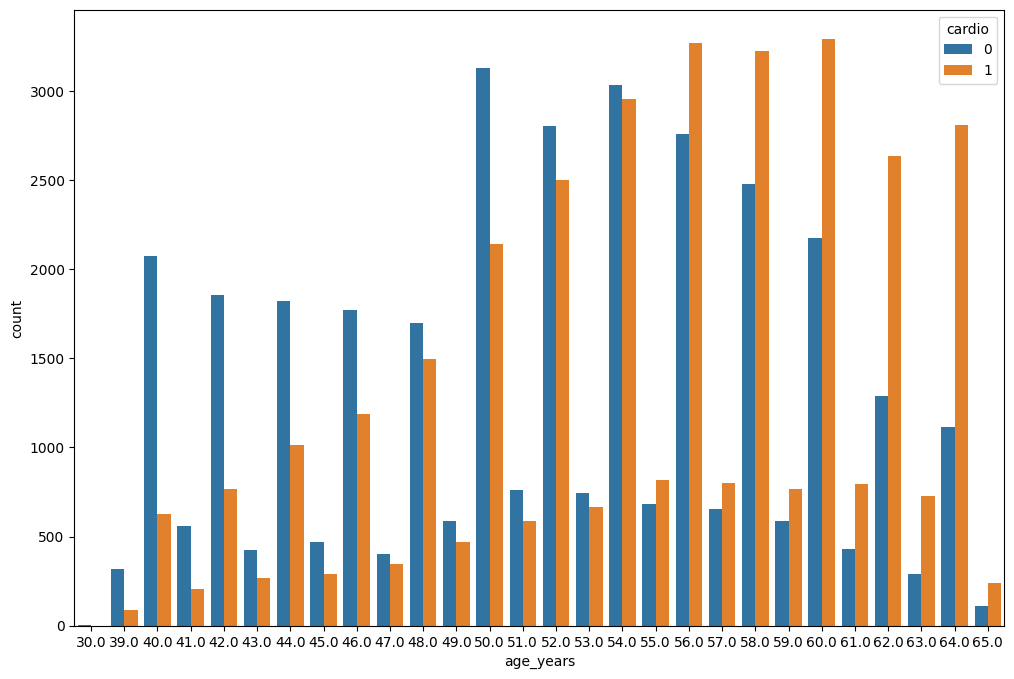

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(data=filtered_df,x='age_years',hue='cardio')